In [36]:
import math
from functools import cache

import numpy as np

In [37]:
def binomial(n, k):
    result = 1
    for i in range(1, k+1):
        result *= n - i + 1
        result /= i
    return result


def prob(n, k, p):
    return p**k * (1-p)**(n-k) * binomial(n, k)


@cache
def probge(n, k, p):
    return sum(prob(n, i, p) for i in range(k, n+1))

In [44]:
def safe_percentage_malicious_validators(kp, e=None):
    '''
    Given a SC majority we want to see confirming a block, we can
    compute how many malicious validators (as a percentage) we can
    tolerate as having a negligible chance of corruption.

    This function approximates the following inequation:
    sum(
        (p^k * (1-p)^(n-k) * binomial(n, k))
        for k in range(342, 512+1)
    ) < 2^(-80).

    If you can compute this analytically, please drop a comment.
    '''
    e = e or 2**(-80)
    k = math.ceil(512 * kp)
    
    def bounds():
        a = None
        for b in np.linspace(0, 1, 2**10):
            cond = probge(512, k, b) < e
            if not cond:
                break
            a = b
        return a, b

    a, b = bounds()
    safe = None
    for p in np.linspace(a, b, 2**10):
        cond = probge(512, k, p) < e
        if not cond:
            break
        safe = p

    return safe

44.26566296777251 [8.271806125530277e-25]
51.29738401898084 [9.094947017729282e-13]
56.38878616837183 [9.5367431640625e-07]


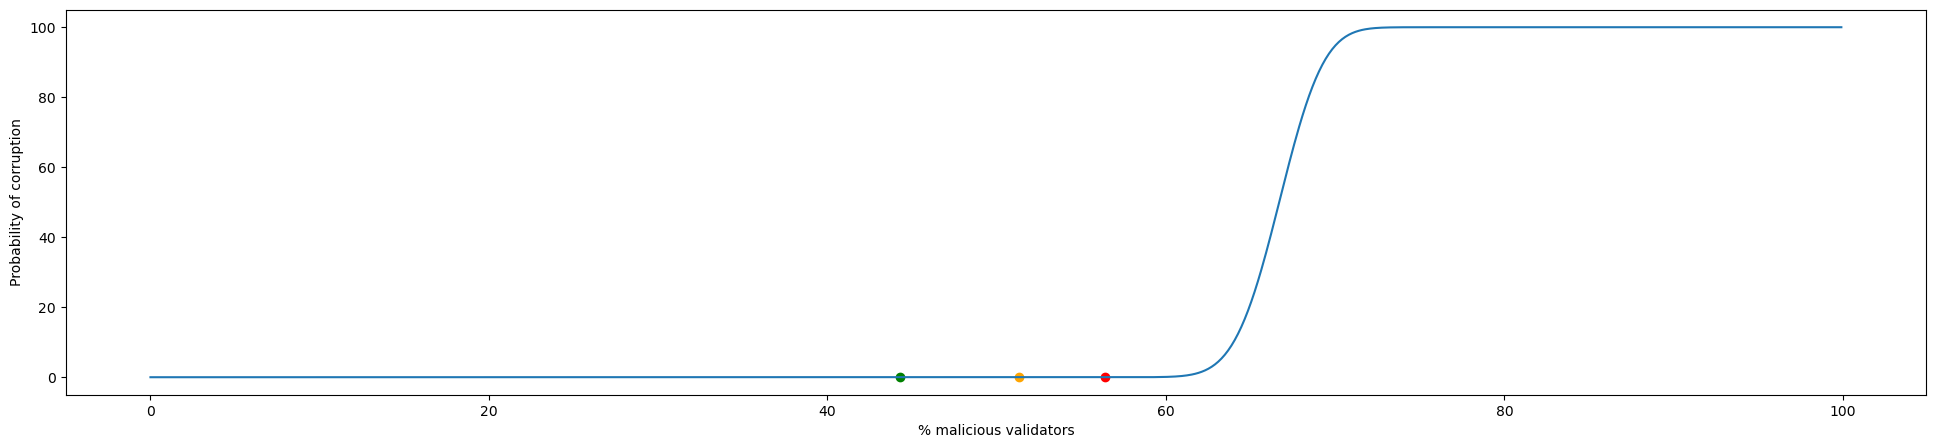

In [51]:
from matplotlib import pyplot as plt
import numpy as np


def f():
    xs = np.linspace(0, 100, 2**10, endpoint=False)
    ys = [100 * probge(512, 342, x/100) for x in xs]
    plt.figure(figsize=(24, 5))
    plt.xlabel('% malicious validators')
    plt.ylabel('Probability of corruption')
    plt.plot(xs, ys)
    for (power, color) in [(80, 'green'), (40, 'orange'), (20, 'red')]:
        y = [2**-power]
        x = 100 * safe_percentage_malicious_validators(2/3, y[0])
        print(x, y)
        plt.scatter([x], [y], c=color)
    plt.savefig('malicious-corruption.png')
    plt.show()
f()

In [31]:
xs = np.linspace(2/3, 1, 512)
ys = [safe_percentage_malicious_validators(kp) for kp in xs]

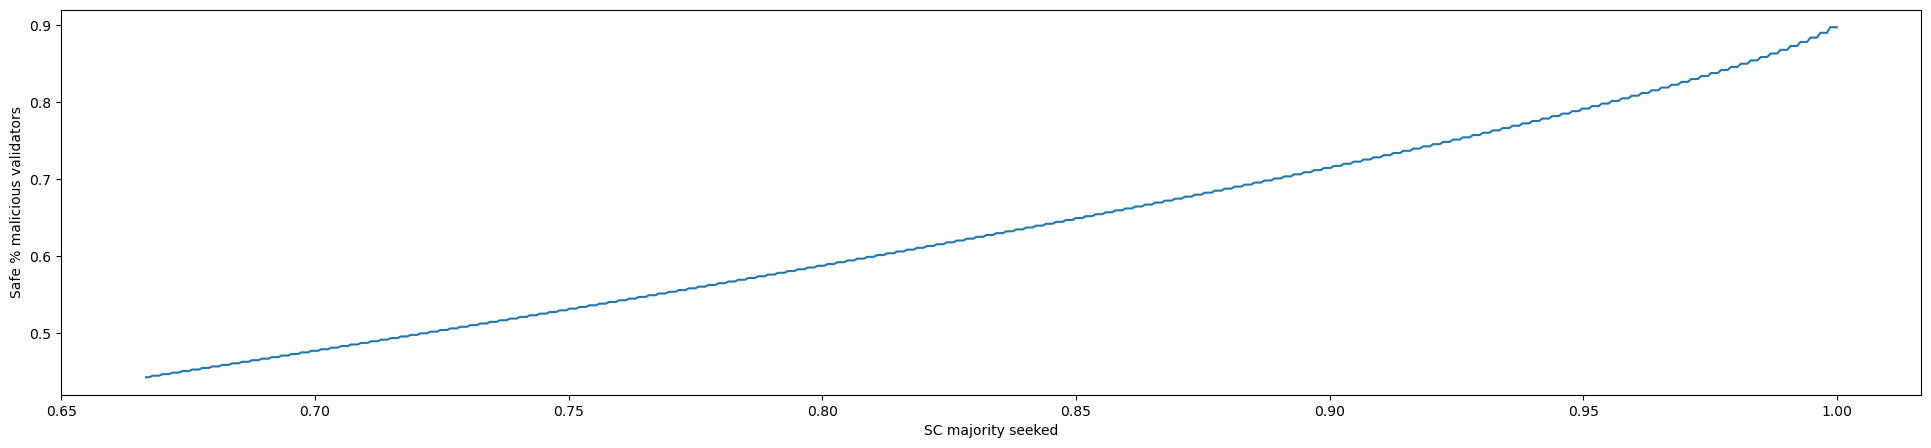

In [34]:
plt.figure(figsize=(24, 5))
plt.plot(xs, ys)
plt.xlabel('SC majority seeked')
plt.ylabel('Safe % malicious validators')
plt.savefig('majority-safemal.png')
plt.show();

In [35]:
safe_percentage_malicious_validators(2/3)

0.4426566296777251